### Leave-One-Out (Validare incrucisata)

In [43]:
import csv
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [42]:
df = pd.read_csv("data/world-happiness-report-2017.csv")
df.dropna()

inputs = df["Economy..GDP.per.Capita."]
outputs = df["Happiness.Score"]

nr = df.shape[0]
# print(nr)

arr = np.array_split(range(nr), nr)

input_sets = [[df["Economy..GDP.per.Capita."].iloc[index] for index in indexes] for indexes in arr]
output_sets = [[df["Happiness.Score"].iloc[index] for index in indexes] for indexes in arr]

# print(input_sets)
# print(output_sets)

errors = []

for i in range(nr):
    test_input, test_output = input_sets[i], output_sets[i]
    train_input = []
    train_output = []
    regressor = linear_model.SGDRegressor()
    for j in range(nr):
        if j != i:
            train_input += input_sets[j]
            train_output += output_sets[j]

    xx = [[el] for el in train_input]
    regressor.partial_fit(xx, train_output)

    xx = [[el] for el in test_input]
    computed_output = regressor.predict(xx)

    errors.append(mean_squared_error(test_output, computed_output))


w0, w1 = regressor.intercept_, regressor.coef_[0]
print(f"f(x) = {w0} + {w1} * x")
# print(errors)
print(f"Avg error: {sum(errors) / len(errors)}")

f(x) = [1.8147146] + 1.9312037922006973 * x
Avg error: 3.220676246183306


### Functii de loss

In [50]:
df = pd.read_csv("data/world-happiness-report-2017.csv")

df.dropna()

inputs = df["Economy..GDP.per.Capita."]
outputs = df["Happiness.Score"]

# impartire in training si testing data
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

- squared error
(media patratelor diferentelor dintr valorile reale si predictiile modelului)

In [59]:
regressor = linear_model.SGDRegressor(loss="squared_error")
xx = [[el] for el in trainInputs]
regressor.fit(xx, trainOutputs)
computed_output = regressor.predict([[el] for el in testInputs])
print(metrics.r2_score(y_true=testOutputs, y_pred=computed_output))


0.7178090351675614


- huber

In [58]:
regressor = linear_model.SGDRegressor(loss="huber")
xx = [[el] for el in trainInputs]
regressor.fit(xx, trainOutputs)
computed_output = regressor.predict([[el] for el in testInputs])
print(metrics.r2_score(y_true=testOutputs, y_pred=computed_output))


0.48425514293139815


- epsilon insensitive

In [60]:
regressor = linear_model.SGDRegressor(loss="epsilon_insensitive")
xx = [[el] for el in trainInputs]
regressor.fit(xx, trainOutputs)
computed_output = regressor.predict([[el] for el in testInputs])
print(metrics.r2_score(y_true=testOutputs, y_pred=computed_output))


0.7172822545132675


Ce se întamplă în cazul clasificarii binare daca se modifică pragul de decizie din 0.5 în alte valori. <br> 
Cum se poate aprecia calitatea clasificatorului pentru diferite valori ale pragului?

- daca pragul de decizie scade (0.5 <), clasificatorul nu are nevoie de multa 'incredere' pentru a clasifica o predictie ca fiind corecta.
- daca pragul de decizie creste, clasificatorul are nevoie de multa 'incredere' pentru a clasifica o predictie ca fiind corecta.


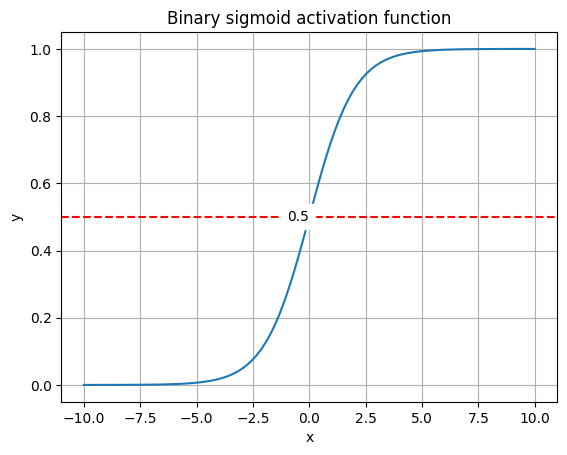

In [75]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100) 
sigmoid = 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid)
plt.xlabel('x')
plt.ylabel('y')
plt.title('')

plt.axhline(y=0.5, color='r', linestyle='--')
plt.text(0, 0.5, '0.5', va='center', ha='right', backgroundcolor='w')
plt.title("Binary sigmoid activation function")

plt.grid(True)
plt.show()
